In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import pandas as pd

from src.config import DADOS_ORIGINAIS, DADOS_TRATADOS
from src.graficos import PALETTE 

sns.set_theme(palette='bright')

### Verificação da natureza da base de dados

In [2]:
df = pd.read_csv(DADOS_ORIGINAIS)

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df.describe(exclude='number')

,Species
count,150
unique,3
top,Iris-setosa
freq,50


In [6]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

É possível identificar que a base esta dividida em partes homogênias entre as classes, isso é bastante relevante e trás mais robustez e confibilidade na hora de construirmos o modelo de classificação.

In [7]:
df[df.duplicated()]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


In [8]:
# Excluindo a coluna de identificação da flor, já que não traz informações relevantes para construção do modelo
df = df.drop(columns='Id')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


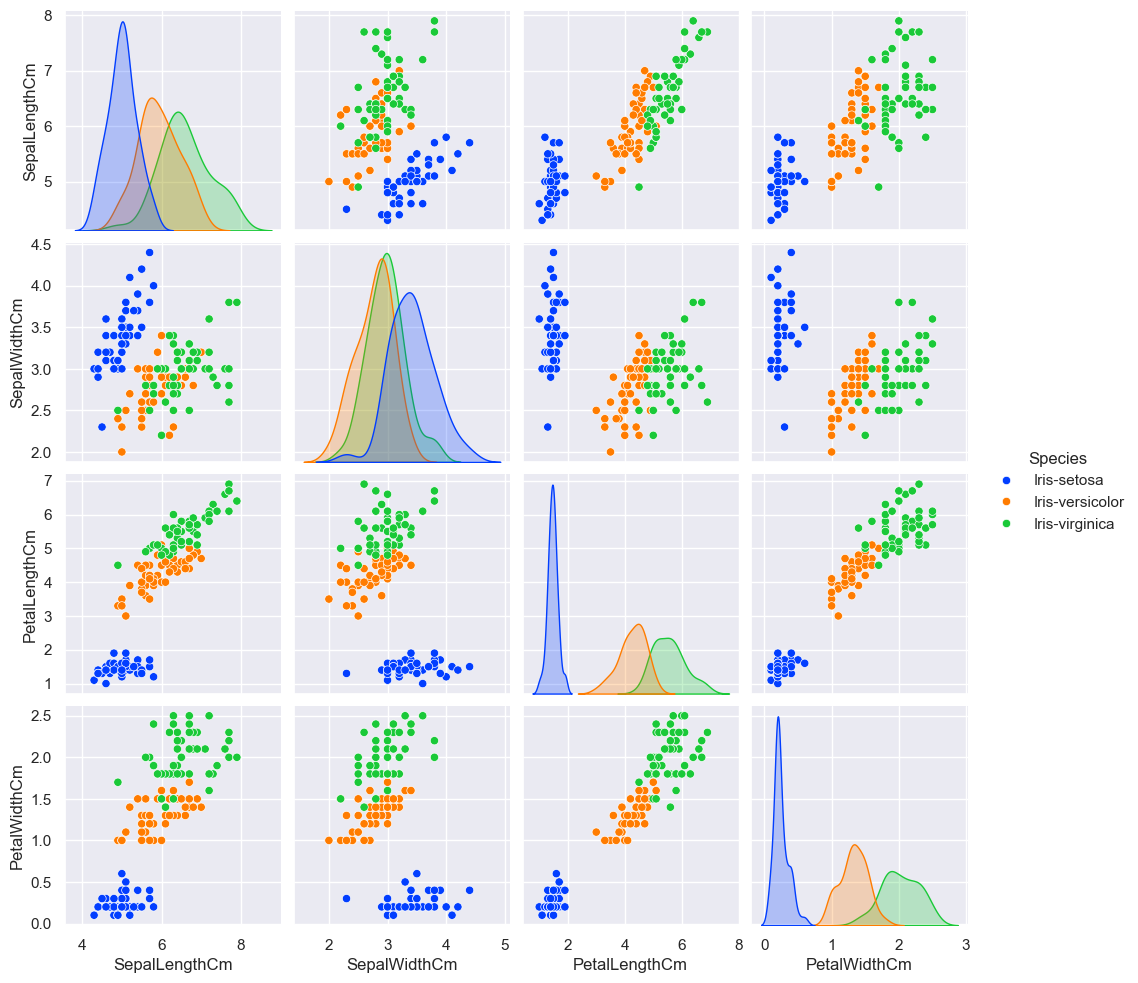

In [10]:
sns.pairplot(df, hue='Species')

Podemos observar que existe uma clara correlação entre as medidas e a espécie de cada Iris, sendo linearmente separáveis. Sendo assim, modelos mais simples podem classificar corretamente cada classe. Trazendo benefícios como custo computacional e complexidade reduzidas. 

<Axes: >

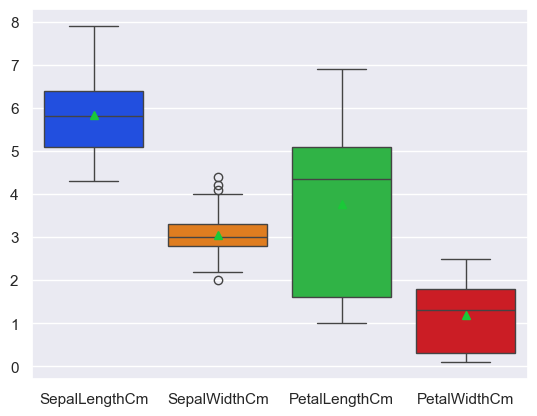

In [11]:
sns.boxplot(data=df, showmeans=True)

Existe uma variação expressiva entre as medidas de sépalas e pétalas, portanto podemos aplicar um pré-processamento de escala para otimizarmos o modelo e garantir que nenhuma variável irá distorcer a classificação. 

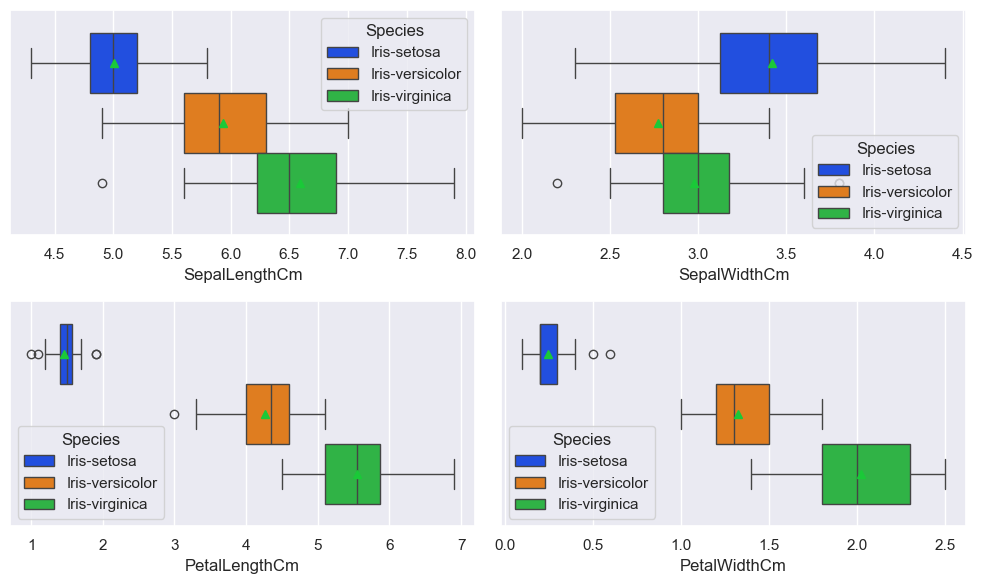

In [12]:
fig, ax = plt.subplots(2,2, figsize=(10,6))

for ax, coluna, in zip(ax.flatten(), df.select_dtypes('number').columns):
    sns.boxplot(data=df, x=coluna, hue='Species', ax=ax, showmeans=True)

plt.tight_layout()
plt.show()

In [13]:
#Exportando a base tratada para utilizar na construção do modelo.
df.to_parquet(DADOS_TRATADOS, index=False)